#### Graph analysis

In [54]:
import networkx as nx
import pm5py as pm5_graph

In [58]:
import networkx as nx

def remove_skip_edges(G: nx.DiGraph):
    """
    Remove nodes from a directed graph whose name (node attribute 'name' or the node itself if a string)
    starts with 'skip'.
    """
    nodes_to_remove = []

    for node in G.nodes:
        # Get the node name: if node is a string, use it; otherwise, try G.nodes[node]['name']
        node_name = None
        if isinstance(node, str):
            node_name = node
        elif 'name' in G.nodes[node]:
            node_name = G.nodes[node]['name']
        
        if node_name and node_name.startswith("skip"):
            nodes_to_remove.append(node)

    # Remove nodes (this automatically removes connected edges in a DiGraph)
    G.remove_nodes_from(nodes_to_remove)

    return G

In [61]:
G = nx.read_graphml('results/high-level-petrinet/Storage.graphml')
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 359
Number of edges: 482
Average in degree:   1.3426
Average out degree:   1.3426


In [62]:
G = remove_skip_edges(G)
print(nx.info(G))


Name: 
Type: DiGraph
Number of nodes: 254
Number of edges: 272
Average in degree:   1.0709
Average out degree:   1.0709


In [64]:
def print_strongly_connected_components(G):
    """Prints the strongly connected components of the graph G."""
    scc = list(nx.strongly_connected_components(G))
    print("Number of strongly connected components:", len(scc))
    print("Strongly connected components:", sorted(map(sorted, scc)))

def graph_components_info(G):

    print("Number of weakly connected components:", nx.number_weakly_connected_components(G))
    print("Weakly connected components:", sorted(map(sorted, nx.weakly_connected_components(G))))
    print("Number of strongly connected components:", nx.number_strongly_connected_components(G))
    print("Strongly connected components:", sorted(map(sorted, nx.strongly_connected_components(G))))
    print("Connected components:", nx.number_connected_components(G.to_undirected()))
    print("Number of circles:", len(nx.find_cycle(G)))

graph_components_info(G)

Number of weakly connected components: 5
Weakly connected components: [['016d6abb-a899-4c6f-9c75-9c68b1c8e986', '0c3802ce-fd41-4956-80f7-abc760ad1090', '0c7d46a0-ad88-410c-b399-84685f66d732', '0d640ce3-d020-45ad-b3a4-71b63ce97be8', '124174b8-dec2-4a8b-9dbc-cd37f16671b0', '154680ae-fb7a-4363-8216-1bcd672ddfa6', '183992a1-8ea8-4ca4-8571-48ffb797b992', '1db709c2-23dd-40f4-86af-6ddce947e616', '1e5edd03-f933-40b0-bcb6-cb7dfca77deb', '2bbae5de-6e2a-4272-b5b4-57705be67e50', '2cc2be62-d28c-4b9b-ac2e-f757534ff3e5', '33155eb7-0b39-44ea-9baf-35a1f152f647', '343d95a0-644f-4480-94b4-3e19da794615', '37932d89-96ee-4f0e-ab0c-a5636ae4e1dc', '4087b239-d232-4930-94d6-925e7b720483', '42fbcde1-dba2-47fb-9d95-23b5b3d777f6', '46f73b83-b315-4487-a89f-3131ab993655', '4cfeb715-188a-4d3a-af2c-c991178447fd', '4db09f79-02f9-4324-b47b-565701288d7d', '4f1ec31e-39a5-4593-9519-40d071ca044c', '50edf214-e496-4d38-aad5-64335d341aa9', '550086d2-b4a3-4a67-b1c0-7a27488f4e7b', '5de8b241-9d0e-4a9d-8060-0a688a9d0e29', '62d8551

NetworkXNoCycle: No cycle found.

In [66]:
def k_edge_components(G, k=1):
    """Returns the k-edge components of the graph G."""
    return sorted(map(sorted, nx.k_edge_components(G, k)))

print("K-edge components (k=1) (same like len(sccs):", k_edge_components(G, 1))
print("K-edge components (k=2):", k_edge_components(G, 2))
print("K-edge components (k=3):", k_edge_components(G, 3))

K-edge components (k=1) (same like len(sccs): [['016d6abb-a899-4c6f-9c75-9c68b1c8e986'], ['0c3802ce-fd41-4956-80f7-abc760ad1090'], ['0c7d46a0-ad88-410c-b399-84685f66d732'], ['0d640ce3-d020-45ad-b3a4-71b63ce97be8'], ['124174b8-dec2-4a8b-9dbc-cd37f16671b0'], ['154680ae-fb7a-4363-8216-1bcd672ddfa6'], ['183992a1-8ea8-4ca4-8571-48ffb797b992'], ['1db709c2-23dd-40f4-86af-6ddce947e616'], ['1e5edd03-f933-40b0-bcb6-cb7dfca77deb'], ['2bbae5de-6e2a-4272-b5b4-57705be67e50'], ['2cc2be62-d28c-4b9b-ac2e-f757534ff3e5'], ['33155eb7-0b39-44ea-9baf-35a1f152f647'], ['343d95a0-644f-4480-94b4-3e19da794615'], ['37932d89-96ee-4f0e-ab0c-a5636ae4e1dc'], ['4087b239-d232-4930-94d6-925e7b720483'], ['42fbcde1-dba2-47fb-9d95-23b5b3d777f6'], ['46f73b83-b315-4487-a89f-3131ab993655'], ['495feb21-ac53-4bc1-b40b-275253f27e74'], ['4cfeb715-188a-4d3a-af2c-c991178447fd'], ['4db09f79-02f9-4324-b47b-565701288d7d'], ['4f1ec31e-39a5-4593-9519-40d071ca044c'], ['50edf214-e496-4d38-aad5-64335d341aa9'], ['550086d2-b4a3-4a67-b1c0-7a2

In [67]:
def k_edge_subgraphs(G, k=1):
    """Returns the k-edge subgraphs of the graph G."""
    return sorted(map(sorted, nx.k_edge_subgraphs(G, k=1)))

print("K-edge subgraphs (k=1):", k_edge_subgraphs(G, 1))
print("K-edge subgraphs (k=2):", k_edge_subgraphs(G, 2))
print("K-edge subgraphs (k=3):", k_edge_subgraphs(G, 3))

K-edge subgraphs (k=1): [['016d6abb-a899-4c6f-9c75-9c68b1c8e986'], ['0c3802ce-fd41-4956-80f7-abc760ad1090'], ['0c7d46a0-ad88-410c-b399-84685f66d732'], ['0d640ce3-d020-45ad-b3a4-71b63ce97be8'], ['124174b8-dec2-4a8b-9dbc-cd37f16671b0'], ['154680ae-fb7a-4363-8216-1bcd672ddfa6'], ['183992a1-8ea8-4ca4-8571-48ffb797b992'], ['1db709c2-23dd-40f4-86af-6ddce947e616'], ['1e5edd03-f933-40b0-bcb6-cb7dfca77deb'], ['2bbae5de-6e2a-4272-b5b4-57705be67e50'], ['2cc2be62-d28c-4b9b-ac2e-f757534ff3e5'], ['33155eb7-0b39-44ea-9baf-35a1f152f647'], ['343d95a0-644f-4480-94b4-3e19da794615'], ['37932d89-96ee-4f0e-ab0c-a5636ae4e1dc'], ['4087b239-d232-4930-94d6-925e7b720483'], ['42fbcde1-dba2-47fb-9d95-23b5b3d777f6'], ['46f73b83-b315-4487-a89f-3131ab993655'], ['495feb21-ac53-4bc1-b40b-275253f27e74'], ['4cfeb715-188a-4d3a-af2c-c991178447fd'], ['4db09f79-02f9-4324-b47b-565701288d7d'], ['4f1ec31e-39a5-4593-9519-40d071ca044c'], ['50edf214-e496-4d38-aad5-64335d341aa9'], ['550086d2-b4a3-4a67-b1c0-7a27488f4e7b'], ['5de8b24

In [68]:
largest = max(nx.strongly_connected_components(G), key=len)

[(0, {'members': {'p_89'}}), (1, {'members': {'p_147'}}), (2, {'members': {'a9f88616-2c82-4861-9d82-925096f7c6a2'}}), (3, {'members': {'p_146'}}), (4, {'members': {'init_loop_155'}}), (5, {'members': {'p_143'}}), (6, {'members': {'p_136'}}), (7, {'members': {'6d1a310f-2307-4ba5-a72a-65fc7567575f'}}), (8, {'members': {'p_135'}}), (9, {'members': {'init_loop_144'}}), (10, {'members': {'p_133'}}), (11, {'members': {'p_141'}}), (12, {'members': {'95ddcb7e-4bff-4d9d-9d3d-2e0e687cab00'}}), (13, {'members': {'p_140'}}), (14, {'members': {'init_loop_149'}}), (15, {'members': {'p_138'}}), (16, {'members': {'tauSplit_141'}}), (17, {'members': {'p_132'}}), (18, {'members': {'bf75d3c2-0a52-4a27-be6b-018ea76f3fe0'}}), (19, {'members': {'p_130'}}), (20, {'members': {'p_101'}}), (21, {'members': {'p_6'}}), (22, {'members': {'p_39'}}), (23, {'members': {'tauJoin_37'}}), (24, {'members': {'p_46'}}), (25, {'members': {'tauJoin_44'}}), (26, {'members': {'p_50'}}), (27, {'members': {'tauJoin_60'}}), (28, 

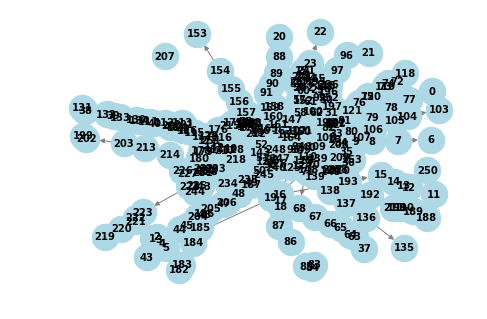

In [69]:
# Condensation of the graph (map SSC to a single node)
import matplotlib.pyplot as plt
H = nx.condensation(G)
print(H.nodes.data())
nx.draw(H, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray')
plt.draw()
plt.show()

In [72]:
H = G.to_undirected()
articulation_points = list(nx.articulation_points(H))
print(f"{len(articulation_points)} Articulation points:", articulation_points)

bridges = list(nx.bridges(H))
print(f"{len(bridges)} Bridges:", bridges)

146 Articulation points: ['a9f88616-2c82-4861-9d82-925096f7c6a2', 'p_146', 'init_loop_155', 'p_143', 'tauSplit_141', '6d1a310f-2307-4ba5-a72a-65fc7567575f', 'p_135', 'init_loop_144', 'p_133', '95ddcb7e-4bff-4d9d-9d3d-2e0e687cab00', 'p_140', 'init_loop_149', 'p_138', 'p_132', 'bf75d3c2-0a52-4a27-be6b-018ea76f3fe0', 'p_130', 'tauSplit_131', 'bb2d19e0-5830-4e94-8d15-9291fdfd49ab', 'p_127', 'init_loop_134', 'p_125', 'p_122', 'init_loop_128', 'p_120', 'c0f3861e-1596-4d99-9614-6693826f36c9', 'p_116', 'ec5f428d-8680-490b-a069-1309c3672bd1', 'p_117', 'p_112', 'tauSplit_111', '1db709c2-23dd-40f4-86af-6ddce947e616', 'p_106', 'init_loop_114', 'p_104', 'p_103', '183992a1-8ea8-4ca4-8571-48ffb797b992', 'p_62', 'tauJoin_50', 'tauJoin_37', 'p_46', 'tauJoin_20', 'tauJoin_12', 'tau_1', 'p_5', 'init_loop_5', 'p_7', 'tauSplit_7', '50edf214-e496-4d38-aad5-64335d341aa9', 'p_25', 'init_loop_22', 'p_23', 'tauSplit_19', 'fffa322e-d1f5-4942-b152-1f057b28e941', 'p_17', 'init_loop_14', 'p_15', 'tauSplit_11', 'tau

In [8]:
nx.find_cycle(G, source='p_38')

[('p_38', 'tauSplit_36'),
 ('tauSplit_36', 'p_45'),
 ('p_45', 'tauSplit_43'),
 ('tauSplit_43', 'p_47'),
 ('p_47', 'e998e5fd-49af-4ae5-a2b3-c1df15d5040c'),
 ('e998e5fd-49af-4ae5-a2b3-c1df15d5040c', 'p_48'),
 ('p_48', 'tauJoin_44'),
 ('tauJoin_44', 'p_46'),
 ('p_46', 'tauJoin_37'),
 ('tauJoin_37', 'p_39'),
 ('p_39', 'skip_167'),
 ('skip_167', 'p_38')]

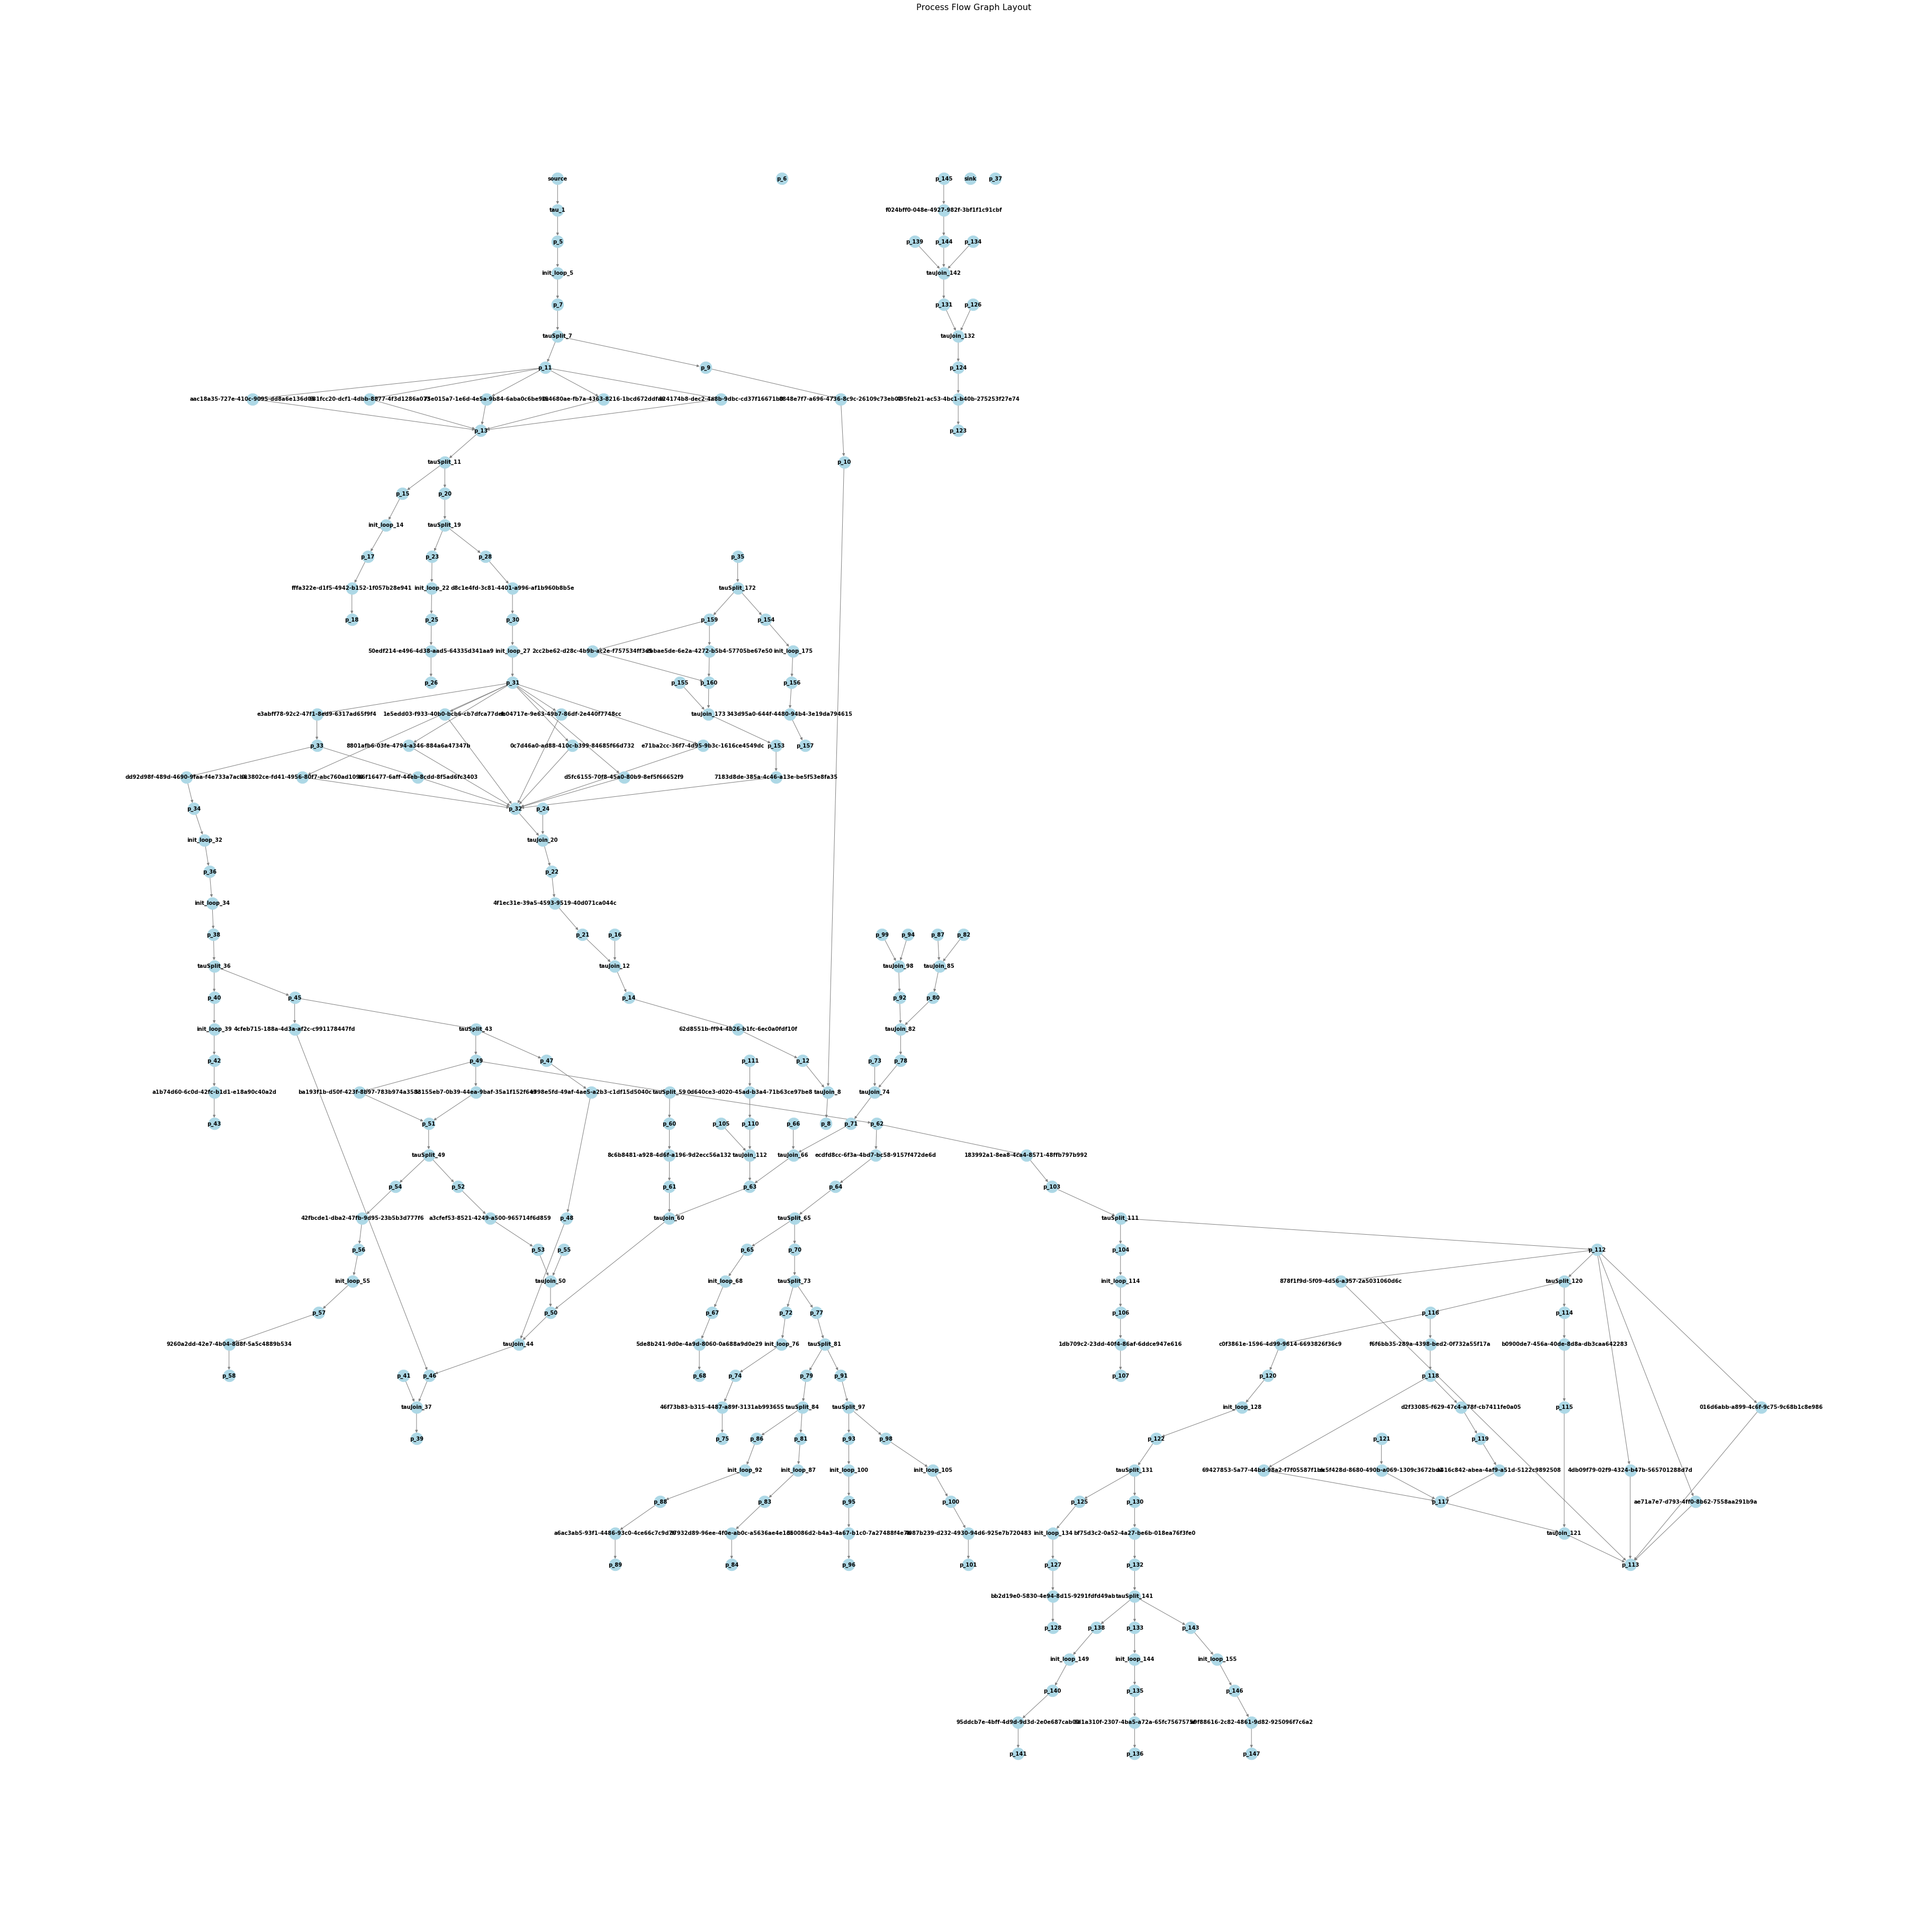

In [73]:
import networkx as nx
import matplotlib.pyplot as plt

# Ensure pygraphviz is installed and configured
from networkx.drawing.nx_agraph import graphviz_layout


# Use Graphviz dot layout for process flow visualization
pos = graphviz_layout(G, prog='dot')

# Draw the graph with labels
plt.figure(figsize=(50, 50))
nx.draw(G, pos, with_labels=True, arrows=True, node_size=500, font_size=10, node_color='lightblue', font_color='black', font_weight='bold', edge_color='gray')
plt.title("Process Flow Graph Layout", fontsize=16)
plt.savefig("output_graph.png", format="png", dpi=300)
plt.show()

In [47]:
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 2.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp37-cp37m-macosx_10_7_x86_64.whl size=99860 sha256=e20ee131686d3a369575c3031cc1ea697f2be69c5e676484669c526d55689e2e
  Stored in directory: /Users/macbookpro/Library/Caches/pip/wheels/8c/bc/0c/ac35392b72556e75107ff610cb31b313e8471918a6d280e34c
Successfully built pygraphviz
